### 참조사이트 : https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [150]:
# fashion mnist 데이터셋 다운

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",    # 데이터를 어디에 저장할지(저장되는 경로)
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [151]:
# MNIST 데이터셋 로드 (train과 test 데이터셋 모두 불러옴)

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 이미지 데이터를 정화하고 텐서타입으로 변환하는 과정
# 이미지를 정규화(nomalize) : 0~255 uint8 -> 0~1 사이의 float
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))   # 평균, 분산
])

train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms
)

In [152]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [153]:
train_ratio = 0.8

train_size = int(len(train_dataset) * train_ratio)
valid_size = len(train_dataset) - train_size

print(train_size, valid_size)

48000 12000


In [154]:
from torch.utils.data import random_split
# random_split으로 train/valid 나누기!

train_data, valid_data = random_split(train_dataset, [train_size,valid_size])

In [155]:
from torch.utils.data import DataLoader

batch_size = 64

# 데이터 로더에 넣기

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [156]:
# 데이터 로더에 넣기

# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [157]:
# 데이터가 잘 로딩되었는지 확인

for images,labels in train_dataloader:
    # print(images[0])
    # print(labels[0])
    print(images.shape, images.dtype)  # torch.Size([64, 1, 28, 28])
    print(labels.shape, labels.dtype)   #t orch.Size([64]) torch.int64
    print(images[0].shape)  # torch.Size([1, 28, 28])
    print(labels[0])    # tensor(1)
    break

torch.Size([64, 1, 28, 28]) torch.float32
torch.Size([64]) torch.int64
torch.Size([1, 28, 28])
tensor(4)


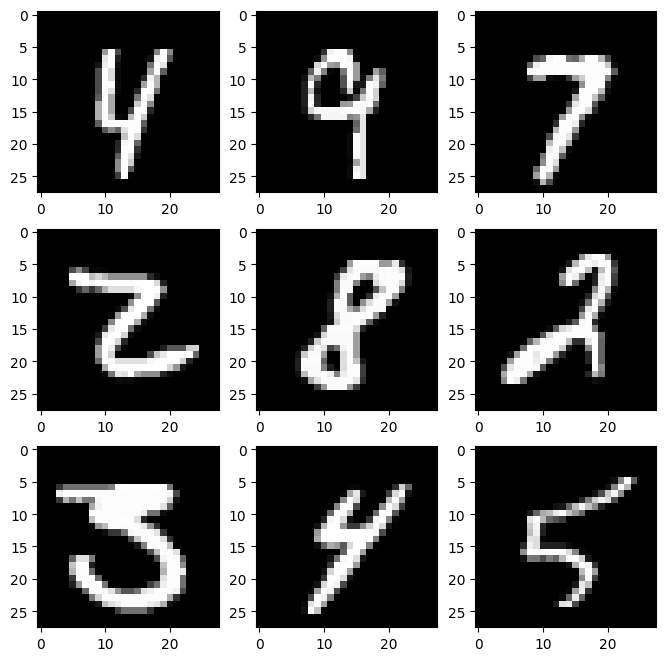

In [158]:
# 이미지를 시각화
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].squeeze(), cmap = "gray")    # squeeze() -> 1차원인 축을 제거하는 함수 (1,28,28)을 (28,28)로 변환
plt.show()

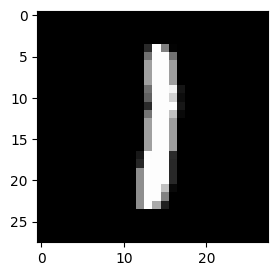

1


In [159]:
# 이미지 시각화
# batchsize = 64라서 0~63까지

import random

idx = random.randint(0,63)
plt.figure(figsize = (3,3))
plt.imshow(images[idx].squeeze(),cmap = 'gray')
plt.show()
print(labels[idx].item())

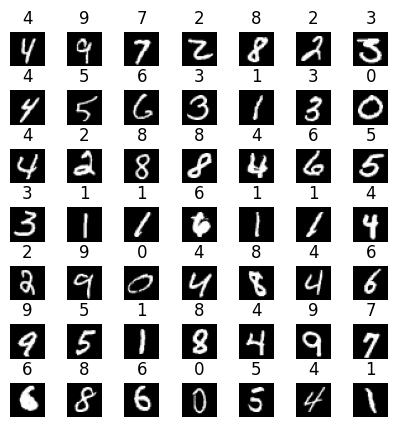

In [160]:
# nxn으로 이미지를 출력

import random

n = 7
plt.figure(figsize = (5,5))
for i in range(n*n):
    plt.subplot(n,n,i+1)
    # plt.subplots_adjust(wspace=0.3, hspace=0.7)   # 여기에 넣어도 됨
    plt.imshow(images[i].squeeze(), cmap = 'gray')
    plt.title(labels[i].item())
    plt.axis('off')

# 서브 플롯간의 간격을 조정하는 함수
plt.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show()

In [161]:
from collections import Counter

labels = train_dataset.targets  # train_dataset.targets에 라벨 정보가 저장됨
print(len(train_dataset.targets))   # 총 60000

# 고유한 클래스와 갯수 확인
class_count = Counter(labels.numpy())
num_classes = len(class_count)

print(f"MNIST 데이터셋의 클래스 수: {num_classes}")
print(f"각 클래스별 이미지 개수: {class_count}")

60000
MNIST 데이터셋의 클래스 수: 10
각 클래스별 이미지 개수: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [162]:
# 신경망을 구성
# 신경망 모델 정의

inputNode = 28*28   #이미지의 픽셀개수(784)
hiddenNode1 = 512
hiddenNode2 = 256
outputNode = 10

# 히든 레이어의 갯수나 파라미터의 갯수는 어떤경우가 제일 좋은지 실험해봐야 한다.
# 파라미터의 갯수는 성능대비 크기가 작을 수록 좋고
# 히든레이어수는 많을수록 보통 성능이 좋지만
# 쌓아도 더 성능이 좋아지지 않는 선이 있다.

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # 입력 레이어 -> 첫 번째 중간 레이어
        self.fc2 = nn.Linear(512, 256)      # 첫 번째 중간 레이어 -> 두 번째 중간 레이어
        self.fc3 = nn.Linear(256, 10)       # 두 번째 중간 레이어 -> 출력 레이어 (10개 클래스)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 입력 이미지를 일렬로 펴서 28*28=784 크기의 벡터로 변환
        x = F.relu(self.fc1(x))  # 첫 번째 중간 레이어에서 ReLU 활성화 함수 적용
        x = F.relu(self.fc2(x))  # 두 번째 중간 레이어에서 ReLU 활성화 함수 적용
        x = self.fc3(x)          # 출력 레이어
        return x

In [193]:
# 훈련
# 모델 객체 정의
lr = 0.001

model = Net().to(device)    #가속을 위해 신경망을 gpu에서 구성
loss_fn = nn.CrossEntropyLoss()  #다중분류를 위한 손실 계산
optimizer = torch.optim.Adam(model.parameters(), lr = lr)   #최적화 정의

In [194]:
train_loss_list = []
valid_loss_list = []
train_acc_list = []
valid_acc_list = []

In [195]:
def train(dataloader, model, loss_fn, optimizer):
    train_correct = 0
    train_total = 0
    # 신경망의 모드를 훈련모드로 설정
    model.train()

    # 매 epoch마다 loss를 누적
    train_loss = 0.0

    for images,labels in train_dataloader:  #한번에 배치사이즈 만큼의 이미지와 레이블을 가져온다.
        images, labels = images.to(device), labels.to(device)   # 신경망을 gpu에 구성했으니 데이터도 gpu로 보내줌
        # 기울기 0으로 초기화
        optimizer.zero_grad()
        # 이미지로 추론해서 예측값 출력하기
        y_pred = model(images)
        # 손실값 계산
        loss = loss_fn(y_pred, labels)
        # 오차역전파법으로 기울기 구하기
        loss.backward()
        # w,b업데이트
        optimizer.step()    # W_new = w_old - lr * grad(w)
        # loss값 누적
        train_loss += loss.item()

        _, predicted = torch.max(y_pred.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted==labels).sum().item()

    train_acc = 100 * train_correct/train_total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    return train_loss
    # # 매 epoch마다 loss값을 출력
    # print(f"epoch : {epoch +1}/{epochs}, train loss : {train_loss/len(train_dataloader)}")

In [196]:
def valid(dataloader, model, loss_fn):  # 업데이트는 하지않고 검증만 할 것이기 떄문에 optimizer는 받지 않는다.
    # 신경망의 모드를 평가모드로 설정
    model.eval()

    # 매 epoch마다 loss를 누적
    valid_loss = 0.0
    valid_correct = 0     #accuracy를 확인할거라서 맞은 것의 갯수를 확인
    valid_total = 0

    # 기울기를 구하지 않는다.
    with torch.no_grad():
        for images, labels in valid_dataloader:
            images, labels = images.to(device), labels.to(device)
            y_pred = model(images)
            loss = loss_fn(y_pred, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(y_pred.data, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted==labels).sum().item()


    valid_acc = 100 * valid_correct/valid_total
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    return valid_loss, valid_acc

In [192]:
# train_loss_list와 valid_loss_list의 길이 확인
print(f"Train Loss List Length: {len(train_loss_list)}")
print(f"Valid Loss List Length: {len(valid_loss_list)}")

epochs = 20

for epoch in range(epochs):
    # 매 epoch마다 가중치를(파라미터) 학습
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    # 매 epoch마다 loss값을 출력
    print(f"epoch : {epoch +1}/{epochs}, train loss : {train_loss/len(train_dataloader)}")

    valid_loss, val_acc = valid(valid_dataloader, model, loss_fn)
    print(f"valid loss : {valid_loss/len(valid_dataloader)}, accuracy : {val_acc}")

Train Loss List Length: 0
Valid Loss List Length: 0


KeyboardInterrupt: 

In [197]:
# 변수 추가: 최고 검증 정확도와 그에 해당하는 에포크 번호를 추적
best_val_acc = 0.0
best_epoch = 0
best_model_path = 'best_model.pth'  # 저장할 모델 파일 이름

for epoch in range(epochs):
    # 매 epoch마다 가중치를(파라미터) 학습
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    # 매 epoch마다 loss값을 출력
    print(f"epoch : {epoch +1}/{epochs}, train loss : {train_loss/len(train_dataloader)}")

    # 검증 단계
    valid_loss, val_acc = valid(valid_dataloader, model, loss_fn)
    print(f"valid loss : {valid_loss/len(valid_dataloader)}, accuracy : {val_acc}")

    # 성능이 가장 좋은 에포크에서 모델 저장
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch + 1  # 1-based 인덱스
        torch.save(model.state_dict(), best_model_path)  # 모델 가중치 저장
        print(f"Best model saved at epoch {best_epoch} with accuracy {best_val_acc}")

# 모델 학습이 끝난 후, 가장 성능이 좋았던 에포크를 출력
print(f"Training complete. Best model was at epoch {best_epoch} with accuracy {best_val_acc}.")


# # 검증 정확도가 향상될 때마다 모델 저장
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         torch.save(model.state_dict(), os.path.join(checkpoint_dir, 'best_model.pth'))
#         print(f"Best validation accuracy achieved! Model saved to checkpoints/best_model.pth")

epoch : 1/20, train loss : 0.22550035276760658
valid loss : 0.11792585222010916, accuracy : 96.28333333333333
Best model saved at epoch 1 with accuracy 96.28333333333333
epoch : 2/20, train loss : 0.09431428266192476
valid loss : 0.10830262092566316, accuracy : 96.60833333333333
Best model saved at epoch 2 with accuracy 96.60833333333333
epoch : 3/20, train loss : 0.06712641912326217
valid loss : 0.08633966843889868, accuracy : 97.34166666666667
Best model saved at epoch 3 with accuracy 97.34166666666667
epoch : 4/20, train loss : 0.04646477062689761
valid loss : 0.07415803062402584, accuracy : 97.75
Best model saved at epoch 4 with accuracy 97.75
epoch : 5/20, train loss : 0.03998728524144584
valid loss : 0.08273872577720272, accuracy : 97.59166666666667
epoch : 6/20, train loss : 0.033301537530884766
valid loss : 0.08880119914674457, accuracy : 97.525
epoch : 7/20, train loss : 0.029844667303259485
valid loss : 0.08832152247912822, accuracy : 97.68333333333334
epoch : 8/20, train los

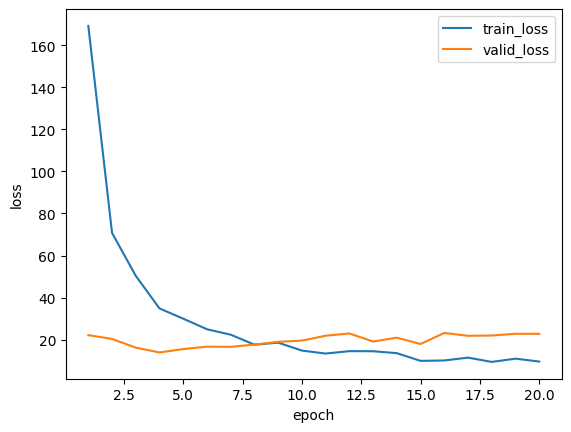

In [198]:
# 시각화

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1,epochs+1), train_loss_list, label = 'train_loss')
plt.plot(range(1,epochs+1), valid_loss_list, label = 'valid_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

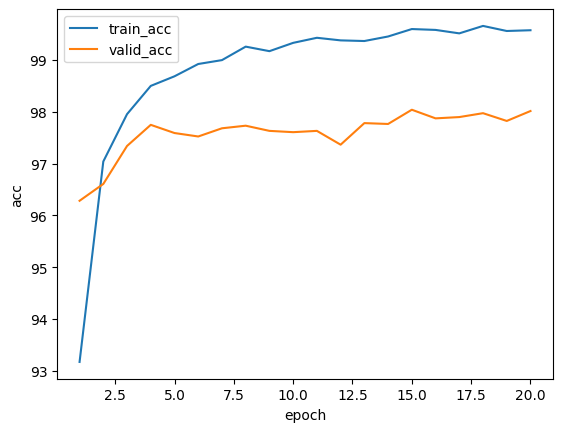

In [199]:
plt.figure()
plt.plot(range(1,epochs+1), train_acc_list, label = 'train_acc')
plt.plot(range(1,epochs+1), valid_acc_list, label = 'valid_acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()